Importing relevant libraries for data wrangling

In [5]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df_baseline = pd.DataFrame()
cols_list_baseline = [1]
for i in range(8, (60*7 + 2), 7):  # Strategy is in every 7th column starting at the 6th column for 60 traders
    cols_list_baseline.append(i)

df_baseline_row_times = []
for i in range(0, 2588400, 3600):
    df_baseline_row_times.append(i)

name_loc_in_csv = []
for i in range(4, 419, 7):
    name_loc_in_csv.append(i)

def prade2_profit(row):
    """Function to calculate profit of PRDE at each time interval 3600"""
    return row[row.index.str.contains("PRADE2")].sum()

def prade_profit(row):
    """Function to calculate profit of PRADE at each time interval 3600"""
    return row[row.index.str.contains("PRADE")].sum()

df_profit_PRADE2 = pd.DataFrame()
df_profit_PRADE = pd.DataFrame()
n = 20
for i in range(n):
    new_col_names = []
    new_col_names.append(pd.read_csv("PRADE_v_PRADE2_" + str(i) + "_strats.csv", header=None, usecols=name_loc_in_csv))
    df_new_col_names = pd.concat(new_col_names)  # Easier to manipulate DataFrame than List
    df_new_col_names.drop(df_new_col_names.index.tolist()[1:], axis=0, inplace=True)
    df_new_col_names.columns = [i for i in range(60)]

    test_data_i = []
    test_data_i.append(pd.read_csv("PRADE_v_PRADE2_" + str(i) + "_strats.csv", header=None, usecols=cols_list_baseline))
    df_test_data_i = pd.concat(test_data_i)
    df_test_data_i.set_index(1, inplace=True)
    df_test_data_i.columns = [i for i in range(60)]

    df_profit_i = pd.concat([df_new_col_names, df_test_data_i])
    df_profit_i.columns = df_profit_i.iloc[0]  # Setting the column names to equal the first column
    df_profit_i = df_profit_i.iloc[1:]  # Dropping first column

    df_profit_PRADE2[f"Total current-to-rand/1 PPS {i}"] = df_profit_i.apply(prade2_profit, axis=1)
    df_profit_PRADE[f"Total rand/1 PPS {i}"] = df_profit_i.apply(prade_profit, axis=1)

#df_baseline["Mean PPS"] = df_baseline.sum(axis=1) / 10
df_profit_PRADE2["Mean PPS"] = df_profit_PRADE2.sum(axis=1) / n
df_profit_PRADE["Mean PPS"] = (df_profit_PRADE.sum(axis=1)) / n


,Total current-to-rand/1 PPS 0,Total current-to-rand/1 PPS 1,Total current-to-rand/1 PPS 2,Total current-to-rand/1 PPS 3,Total current-to-rand/1 PPS 4,Total current-to-rand/1 PPS 5,Total current-to-rand/1 PPS 6,Total current-to-rand/1 PPS 7,Total current-to-rand/1 PPS 8,Total current-to-rand/1 PPS 9,...,Total current-to-rand/1 PPS 11,Total current-to-rand/1 PPS 12,Total current-to-rand/1 PPS 13,Total current-to-rand/1 PPS 14,Total current-to-rand/1 PPS 15,Total current-to-rand/1 PPS 16,Total current-to-rand/1 PPS 17,Total current-to-rand/1 PPS 18,Total current-to-rand/1 PPS 19,Mean PPS
1,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000
3600,22.154619,17.793333,24.960280,26.821112,30.712779,28.909445,29.234720,22.802224,24.284166,25.376390,...,29.195276,28.914722,7.593888,26.277223,30.109724,37.348439,29.366253,19.506667,25.021434,25.508857
7200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10800,23.916668,21.353612,29.725833,22.364826,28.955558,20.620831,24.453610,21.311664,24.248612,21.601033,...,25.888334,23.823890,15.689166,26.307222,38.413511,38.677321,26.878056,19.288245,32.206666,25.581997
14400,23.912501,0.000000,29.770140,22.562830,0.000000,20.809442,24.179860,21.338611,24.055470,21.396765,...,25.716111,23.845415,15.737221,26.494582,38.659116,38.535555,0.000000,19.286805,31.752502,20.402646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574000,30.965425,25.272101,32.263735,33.108613,37.018130,37.306056,37.881148,27.938313,33.059211,32.898742,...,39.767039,37.623810,18.578635,33.878769,42.229380,47.982676,37.834555,29.420780,40.082984,34.575231
2577600,30.839912,25.224183,32.236976,32.877621,37.122201,37.371354,37.832073,27.937414,33.137201,32.854272,...,39.756607,37.567566,18.556790,33.939737,42.285764,47.963116,37.747533,29.561625,40.040097,34.555825
2581200,32.048664,29.317094,32.737449,31.707115,35.892777,33.705567,35.293955,29.190933,33.129257,36.579479,...,39.079095,36.758483,16.709910,29.911729,41.924777,48.945185,37.156529,29.138750,40.892003,34.351035
2584800,32.071030,29.389547,32.715416,31.889262,36.013877,33.472424,35.378895,29.192275,33.137680,36.754273,...,39.069723,36.868684,16.615010,29.790507,41.981173,48.744010,37.088143,29.125677,40.785308,34.353834


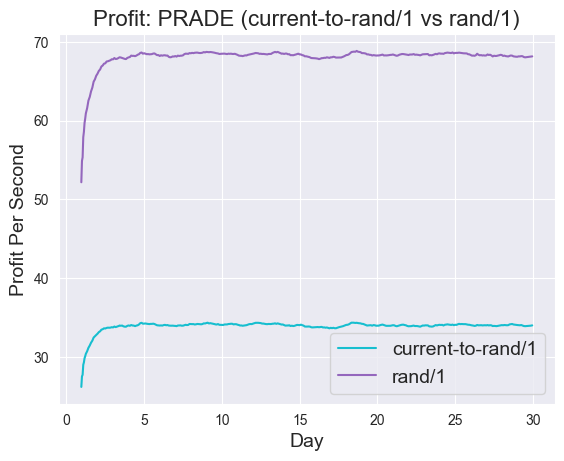

In [16]:
plt.plot((df_profit_PRADE2.index / (60*60*24)), df_profit_PRADE2["Mean PPS"].rolling(24).mean(), color="tab:cyan",
         label="current-to-rand/1", alpha=1)
plt.plot((df_profit_PRADE.index / (60*60*24)), df_profit_PRADE["Mean PPS"].rolling(24).mean(), color="tab:purple",
         label="rand/1", alpha=1)

plt.xlabel("Day", fontsize=14)
plt.ylabel("Profit Per Second", fontsize=14)
plt.title("Profit: PRADE (current-to-rand/1 vs rand/1)", fontsize=16)

plt.legend(fontsize=14, loc="lower right")
plt.savefig("current_v_rand_PPS_1.png")
plt.show()


In [10]:
# Statistical Testing
PRADE_means = df_profit_PRADE.mean(axis=0)
PRADE_means = PRADE_means.reset_index(drop=True)
PRADE2_means = df_profit_PRADE2.mean(axis=0)
PRADE2_means = PRADE2_means.reset_index(drop=True)
stats_df = pd.DataFrame({"current-to-rand/1": PRADE2_means, "rand/1": PRADE_means})

new_labels = []
for i in range(n):
    index = f"Run {i} Mean PPS"
    new_labels.append(index)



stats_df.drop(index=n, inplace=True)
stats_df.index = new_labels
stats_df

,current-to-rand/1,rand/1
Run 0 Mean PPS,34.117916,67.430315
Run 1 Mean PPS,27.512479,67.613750
Run 2 Mean PPS,32.161118,67.662620
Run 3 Mean PPS,30.562900,67.908273
Run 4 Mean PPS,34.723631,67.516545
Run 5 Mean PPS,35.370553,67.679643
Run 6 Mean PPS,36.280940,67.589234
Run 7 Mean PPS,27.592354,67.811061
Run 8 Mean PPS,32.231666,68.326677
Run 9 Mean PPS,35.221750,67.655713


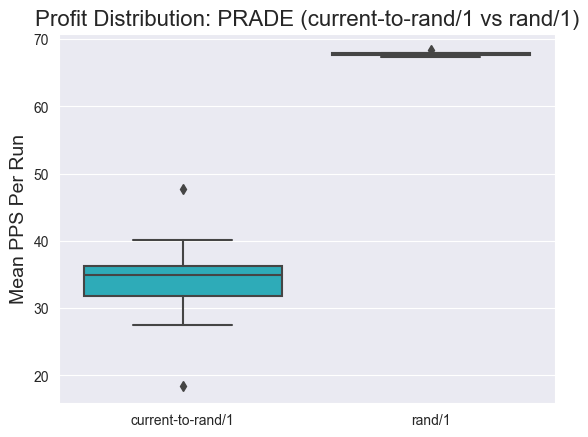

In [19]:
# Visualising with a boxplot
colour_dict = {"rand/1": "tab:orange", "current-to-rand/1": "tab:cyan"}
BWP = sns.boxplot(data=stats_df, palette=colour_dict)
BWP.set_ylabel("Mean PPS Per Run", fontsize=14)
BWP.set_title("Profit Distribution: PRADE (current-to-rand/1 vs rand/1)", fontsize=16)
plt.savefig("Box_and_Whisker_PRADE_1.png")

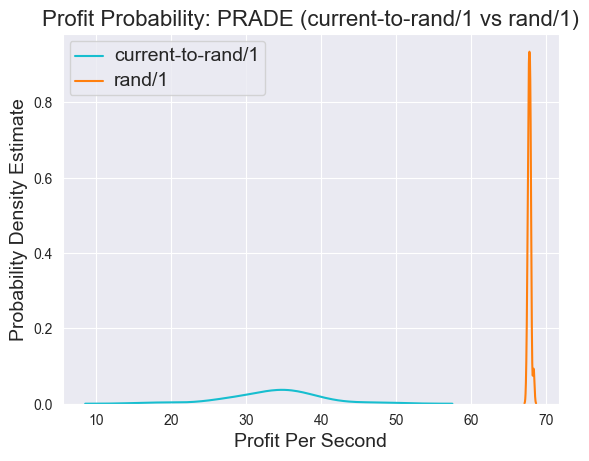

In [20]:
KDE = sns.kdeplot(data=stats_df, legend=True, palette=colour_dict)
KDE.set_ylabel("Probability Density Estimate", fontsize=14)
KDE.set_xlabel("Profit Per Second", fontsize=14)
KDE.set_title("Profit Probability: PRADE (current-to-rand/1 vs rand/1)", fontsize=16)
plt.setp(KDE.get_legend().get_texts(), fontsize="14")
plt.savefig("Kernel_Density_Plot_PRADE_1.png")

In [21]:
# Testing for Normality with Shapiro-Wilk test
for col in stats_df.columns:
    SWstatistic, SWpvalue = stats.shapiro(stats_df[col])
    print(f"SW: {col} data is Normally Distributed") if SWpvalue > 0.05 else print(f"SW: {col} data is Not Normally Distributed")

# Confirming Shapiro-Wilk results with Kolmogorov-Smirnov test
for col in stats_df.columns:
    normal_data = (stats_df[col] - stats_df[col].mean())/stats_df[col].std()
    KSstatistic, KSpvalue = stats.kstest(normal_data, "norm")
    print(f"KS: {col} data is Normally Distributed") if KSpvalue > 0.05 else print(f"KS: {col} data is Not Normally Distributed")


SW: current-to-rand/1 data is Normally Distributed
SW: rand/1 data is Normally Distributed
KS: current-to-rand/1 data is Normally Distributed
KS: rand/1 data is Normally Distributed


In [23]:
statistic, pvalue = stats.ttest_ind(stats_df["current-to-rand/1"], stats_df["rand/1"])
stmnt1 = f"T-test: PRDE/PRADE (pvalue= {pvalue} < 0.05). Reject that these samples have identical mean"  # Different
stmnt2 = f"T-test: PRDE/PRADE (pvalue= {pvalue} > 0.05). Can't reject that these have identical mean"  # Same
print(stmnt1) if pvalue < 0.05 else print(stmnt2)

T-test: PRDE/PRADE (pvalue= 1.4891460368205626e-25 < 0.05). Reject that these samples have identical mean
